# Tutorial 8: Why is there a Jump2??

---

### Introduction

Hello, in the last notebook we noticed that there is a jump with a certain feature, now we want to investigate why is that is the case. In the prevoius notebook, we noticed a jump by the 5th feature. 

first, let us call the data

In [13]:
%store -r df_input_GS
%store -r y_GS
%store -r df_GS

In [14]:
y_GS = y_GS.map({'S': 1, 'B': 0})

---

calling some packages

In [15]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [16]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GS, y_GS, test_size = 0.3, random_state=3, stratify=y_GS) # train and valid sets

In [17]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


---

<b><i> get the best N features </i></b> 

In [18]:
%store -r featImp_GS

In [19]:
arrimp = np.array(featImp_GS).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1793 1775 2048   31    3 1771  544 1781   17   45]


In [20]:
cols_ordered = df_input_GS.columns[sorted_idx][-400:]
cols_ordered

Index([1841.364,  980.575, 1133.147, 2337.819,  911.297, 1075.338, 1155.366,
        974.677, 1447.594, 1613.342,
       ...
       1968.596, 1942.053, 2441.281,   842.04,  834.451, 1936.251, 1010.382,
       1950.821,  838.229,  845.886],
      dtype='object', length=400)

---

In [21]:
Xtrain[cols_ordered]

,1841.364,980.575,1133.147,2337.819,911.297,1075.338,1155.366,974.677,1447.594,1613.342,...,1968.596,1942.053,2441.281,842.040,834.451,1936.251,1010.382,1950.821,838.229,845.886
210,-0.347752,-0.782148,-0.788094,-0.165300,-0.825079,-0.805515,-0.716025,-0.784317,-0.259222,-0.440796,...,-0.103180,-0.064431,-0.126623,-0.852611,-0.868323,-0.056824,-0.791167,-0.077484,-0.863861,-0.859112
266,0.597408,0.973945,0.975639,0.444570,1.038538,1.021833,0.902108,0.969298,0.414803,0.681119,...,0.323973,0.292242,0.386553,1.040755,1.046849,0.284218,0.986368,0.303714,1.044837,1.048485
458,0.954467,0.148099,0.146223,1.005679,-0.014365,0.042751,0.305590,0.144290,1.058035,0.908711,...,0.992127,0.954164,0.948222,-0.020894,-0.012900,0.947342,0.135750,0.966534,-0.014697,-0.009475
322,0.843525,1.076064,1.073435,0.764227,1.160048,1.132404,1.006338,1.075378,0.779457,0.892410,...,0.693932,0.669354,0.738082,1.176984,1.173067,0.661299,1.091540,0.674564,1.178287,1.173193
171,-1.332538,-1.178695,-1.178955,-1.317824,-1.103519,-1.118396,-1.244864,-1.178938,-1.322936,-1.319953,...,-1.295124,-1.280268,-1.305844,-1.101613,-1.111279,-1.276586,-1.157541,-1.285318,-1.109319,-1.106318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.471415,-0.655091,-0.660125,-0.330135,-0.755149,-0.722527,-0.582161,-0.651424,-0.520635,-0.539580,...,-0.318073,-0.258179,-0.249466,-0.775807,-0.771421,-0.246058,-0.683964,-0.277660,-0.772976,-0.771858
430,1.887427,1.430805,1.428148,1.911442,1.390439,1.399330,1.493246,1.431303,2.074960,1.798811,...,1.950348,1.916986,1.834398,1.378890,1.385954,1.913913,1.412999,1.927220,1.381970,1.384165
5,-0.639943,-0.965198,-0.951341,-0.497273,-0.938288,-0.954291,-0.937417,-0.962535,-0.507058,-0.808180,...,-0.417211,-0.403042,-0.442860,-0.919328,-0.912298,-0.401600,-0.971304,-0.407482,-0.916736,-0.915225
310,1.131033,1.209887,1.212979,1.132749,1.248526,1.238886,1.187899,1.216206,1.094078,1.152663,...,1.100754,1.096170,1.103933,1.246935,1.246373,1.096653,1.219850,1.098692,1.251592,1.253352


### RFE

In [22]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [23]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
for i in range (1, 6):
    print(i)
    rfe = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit RFE
    rfe.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if rfe.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        
    print()
    selected.append(selected_feat)
    
    
    

1
Column: 58, Selected True, Rank: 1.000

2
Column: 58, Selected True, Rank: 1.000
Column: 104, Selected True, Rank: 1.000

3
Column: 58, Selected True, Rank: 1.000
Column: 104, Selected True, Rank: 1.000
Column: 298, Selected True, Rank: 1.000

4
Column: 6, Selected True, Rank: 1.000
Column: 58, Selected True, Rank: 1.000
Column: 104, Selected True, Rank: 1.000
Column: 298, Selected True, Rank: 1.000

5
Column: 6, Selected True, Rank: 1.000
Column: 58, Selected True, Rank: 1.000
Column: 104, Selected True, Rank: 1.000
Column: 131, Selected True, Rank: 1.000
Column: 298, Selected True, Rank: 1.000



---

In [24]:
selected

[[58], [58, 104], [58, 104, 298], [6, 58, 104, 298], [6, 58, 104, 131, 298]]

In [25]:
from itertools import combinations

input = selected[-1]

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
selected2 = output[1:] 
selected2

[[6],
 [58],
 [104],
 [131],
 [298],
 [6, 58],
 [6, 104],
 [6, 131],
 [6, 298],
 [58, 104],
 [58, 131],
 [58, 298],
 [104, 131],
 [104, 298],
 [131, 298],
 [6, 58, 104],
 [6, 58, 131],
 [6, 58, 298],
 [6, 104, 131],
 [6, 104, 298],
 [6, 131, 298],
 [58, 104, 131],
 [58, 104, 298],
 [58, 131, 298],
 [104, 131, 298],
 [6, 58, 104, 131],
 [6, 58, 104, 298],
 [6, 58, 131, 298],
 [6, 104, 131, 298],
 [58, 104, 131, 298],
 [6, 58, 104, 131, 298]]

### LR

In [26]:
lr = LogisticRegression()

In [31]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [32]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [33]:
from source.ml_acc import get_accuracy_ml

In [34]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected2:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        # print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str((f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([1155.366], dtype='object')
Index([1286.67], dtype='object')
Index([884.86], dtype='object')
Index([1315.393], dtype='object')
Index([885.163], dtype='object')
Index([1155.366, 1286.67], dtype='object')
Index([1155.366, 884.86], dtype='object')
Index([1155.366, 1315.393], dtype='object')
Index([1155.366, 885.163], dtype='object')
Index([1286.67, 884.86], dtype='object')
Index([1286.67, 1315.393], dtype='object')
Index([1286.67, 885.163], dtype='object')
Index([884.86, 1315.393], dtype='object')
Index([884.86, 885.163], dtype='object')
Index([1315.393, 885.163], dtype='object')
Index([1155.366, 1286.67, 884.86], dtype='object')
Index([1155.366, 1286.67, 1315.393], dtype='object')
Index([1155.366, 1286.67, 885.163], dtype='object')
Index([1155.366, 884.86, 1315.393], dtype='object')
Index([1155.366, 884.86, 885.163], dtype='object')
Index([1155.366, 1315.393, 885.163], dtype='object')
Index([1286.67, 884.86, 1315.393], dtype='object')
Index([1286.67, 884.86, 885.163], dtype='object

---

In [35]:
# ml_dicts

In [36]:
import json

In [37]:
with open('ml_gs_inv2.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [38]:
import json
with open('ml_gs_inv2.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_gs.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [39]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,[6]', 'lr,[58]', 'lr,[104]', 'lr,[131]', 'lr,[298]', 'lr,[6, 58]', 'lr,[6, 104]', 'lr,[6, 131]', 'lr,[6, 298]', 'lr,[58, 104]', 'lr,[58, 131]', 'lr,[58, 298]', 'lr,[104, 131]', 'lr,[104, 298]', 'lr,[131, 298]', 'lr,[6, 58, 104]', 'lr,[6, 58, 131]', 'lr,[6, 58, 298]', 'lr,[6, 104, 131]', 'lr,[6, 104, 298]', 'lr,[6, 131, 298]', 'lr,[58, 104, 131]', 'lr,[58, 104, 298]', 'lr,[58, 131, 298]', 'lr,[104, 131, 298]', 'lr,[6, 58, 104, 131]', 'lr,[6, 58, 104, 298]', 'lr,[6, 58, 131, 298]', 'lr,[6, 104, 131, 298]', 'lr,[58, 104, 131, 298]', 'lr,[6, 58, 104, 131, 298]'])


In [40]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [41]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


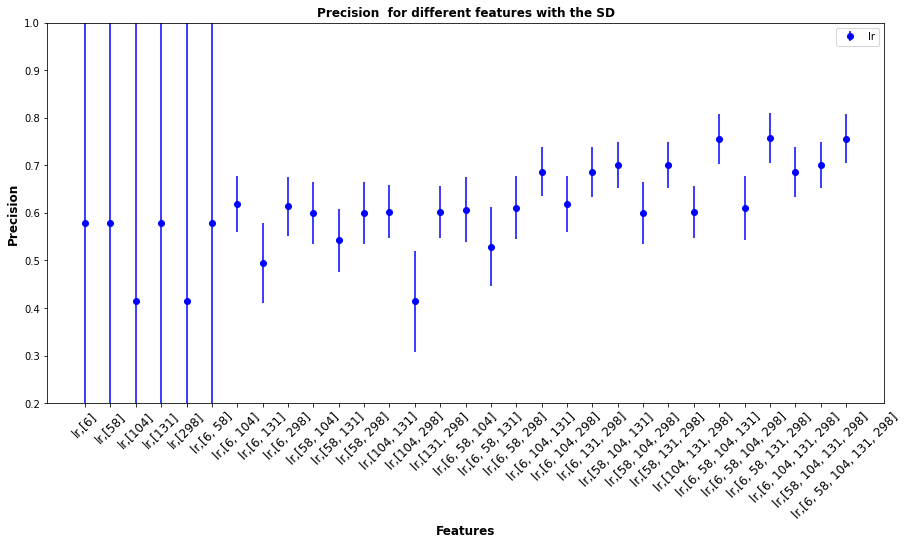

In [42]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,31)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = '45',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [43]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

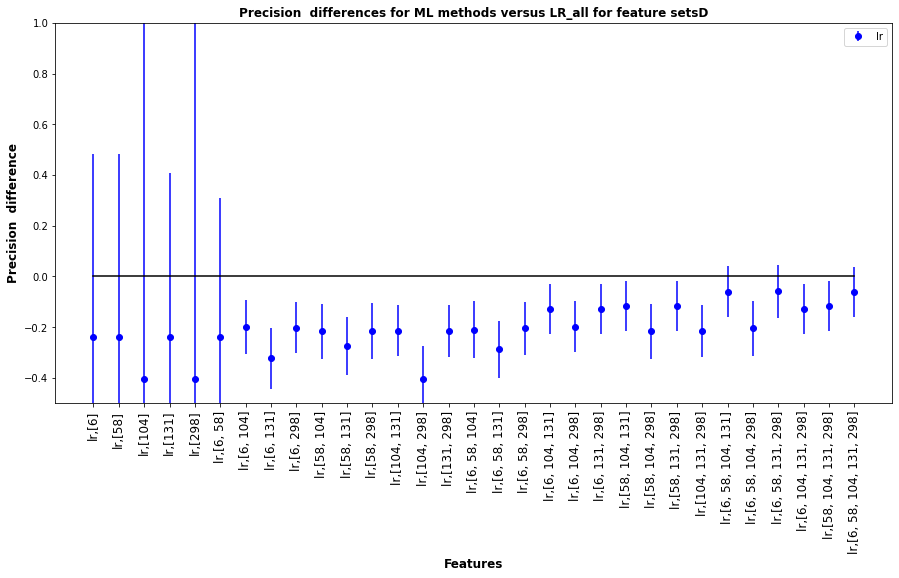

In [45]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,31)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(31*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = '90',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

In [ ]:
[[58], [58, 104], [58, 104, 298], [6, 58, 104, 298], [6, 58, 104, 131, 298]]
